<a href="https://colab.research.google.com/github/BODAPATIs/Servo_Prediction/blob/main/servoprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Servo Prediction using Linear Regression**

#**1.Import Librairy**

In [79]:
import pandas as pd
import numpy as np


# **2.Import csv as dataframe**

In [80]:
servo=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')
servo.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [81]:
servo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


**Summary of DataFrame**

In [82]:
servo.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


**Shape of DataFrame**

In [83]:
servo.shape

(167, 5)

**Colums of Dataframe**

In [84]:
servo.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [85]:
servo[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
dtype: int64

In [86]:
servo[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

In [87]:
servo.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [88]:
servo.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [89]:
servo

,Motor,Screw,Pgain,Vgain,Class
0,4,4,5,4,4
1,1,3,6,5,11
2,3,3,4,3,6
3,1,0,3,2,48
4,3,1,6,5,6
...,...,...,...,...,...
162,1,2,3,2,44
163,1,4,3,1,40
164,2,3,4,3,25
165,0,1,3,2,44


#**3.Define Target Variable(y) and Feature Variables(X)**

In [90]:
y=servo['Class']
y.shape

(167,)

In [91]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [92]:
x=servo[['Motor', 'Screw', 'Pgain','Vgain']]
x.shape

(167, 4)

In [93]:
x=servo.drop('Class',axis=1)

In [95]:
x.shape

(167, 4)

In [96]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


#**4.Train Test Split**

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=2529)

In [99]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50, 4), (117, 4), (50,), (117,))

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
l=LinearRegression()

In [102]:
l.fit(x_train,y_train)

LinearRegression()

#**4.Prediction**

In [103]:
y_pred=l.predict(x_test)

In [104]:
y_pred.shape

(117,)

In [105]:
y_pred

array([ 24.89015109,  28.08391972,  17.55257369,  19.57157488,
        37.1210723 ,  23.02101376,  11.31490029,  17.33873833,
        38.79851087,  39.51501737,  12.99233887,  22.61547965,
        15.87513511,  11.6564629 ,  19.26060249,  16.93320422,
        -4.46259683,  29.92246682,  31.59990539,  -3.35180088,
        30.72229038,  30.8833989 ,  32.80526306,  27.12298763,
        14.53925915,   6.09088581,  27.33682299,  14.70036767,
        21.65454756,   3.45251515,  29.01426157,  22.77658817,
        34.23827605,  28.80042621,   8.30158575,   3.20808956,
        17.8941363 ,  29.76135829,  12.61739498,  36.16014022,
        27.52852175,  19.01617691,   7.34065367,   5.66321509,
        30.1668924 ,  28.24502824,  32.56083747,   4.16902164,
        20.69361548,  18.05524482,  24.45402675,   7.58507925,
        22.58488942,  33.11623545,  15.25576564,   0.5697189 ,
        36.87664671,   0.81414449,  16.21669772,  -1.82422617,
        22.06008168,  30.47786479,  23.52368489,  24.48

#**5.Finding the Error**

In [106]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [107]:
mean_squared_error(y_test,y_pred)


73.57022323365531

In [108]:
mean_absolute_error(y_test,y_pred)

7.158141394974153

In [109]:
r2_score(y_test,y_pred)

0.6372902527668625

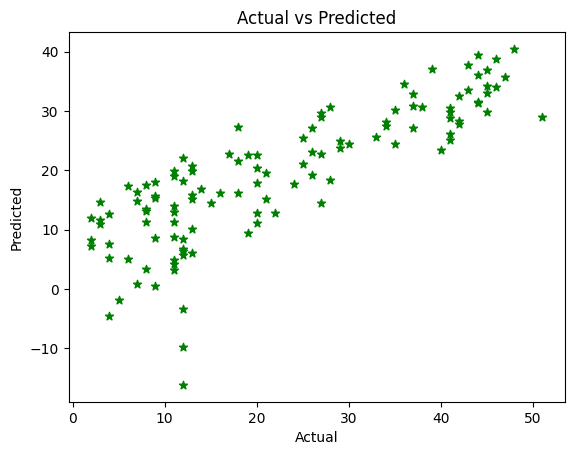

In [110]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,color='g',marker='*')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [111]:
x_new=servo.sample(1)

In [112]:
x_new

,Motor,Screw,Pgain,Vgain,Class
16,3,2,3,1,23


In [113]:
x_new.shape

(1, 5)

In [114]:
x_new=x_new.drop('Class',axis=1)

In [115]:
x_new

,Motor,Screw,Pgain,Vgain
16,3,2,3,1


In [116]:
x_new.shape

(1, 4)

In [117]:
y_pred_new=l.predict(x_new)

In [118]:
y_pred_new

array([25.44554906])